In [1]:
import pickle
import copy
import matplotlib.pyplot as plt

In [2]:
with open("AB.pickle", 'rb') as handle:
    ab = pickle.load(handle)


In [3]:
new_ab = {}
#A segment
for x in range(0, int(len(ab)/2)):
    new_k = int(len(ab)/2)+x
    new_ab[new_k] = copy.deepcopy(ab[x])
    new_ab[new_k]['general_battery_parameters']["graphite_type"] = 'natural'
    new_ab[new_k]['material_content_pack']["anode active material (natural graphite)"] =  new_ab[new_k]['material_content_pack']["anode active material (synthetic graphite)"]
    new_ab[new_k]['material_content_pack']["anode active material (synthetic graphite)"] = 0

new_ab.update({k:v for k,v in ab.items() if k in range(0, int(len(ab)/2))})

In [4]:
#B segment
for x in range(int(len(ab)/2), int(len(ab))):
    new_k = len(ab)+x
    new_ab[new_k] = copy.deepcopy(ab[x])
    new_ab[new_k]['general_battery_parameters']["graphite_type"] = 'natural'
    new_ab[new_k]['material_content_pack']["anode active material (natural graphite)"] =  new_ab[new_k]['material_content_pack']["anode active material (synthetic graphite)"]
    new_ab[new_k]['material_content_pack']["anode active material (synthetic graphite)"] = 0
    
new_ab.update({k+int(len(ab)/2):v for k,v in ab.items() if k in range(int(len(ab)/2), int(len(ab)))})

In [5]:
with open("CD.pickle", 'rb') as handle:
    cd = pickle.load(handle)

In [6]:
new_cd = {}
#C segment
for x in range(0, int(len(cd)/2)):
    new_k = int(len(cd)/2)+x
    new_cd[new_k] = copy.deepcopy(cd[x])
    new_cd[new_k]['general_battery_parameters']["graphite_type"] = 'natural'
    new_cd[new_k]['material_content_pack']["anode active material (natural graphite)"] =  new_cd[new_k]['material_content_pack']["anode active material (synthetic graphite)"]
    new_cd[new_k]['material_content_pack']["anode active material (synthetic graphite)"] = 0

new_cd.update({k:v for k,v in cd.items() if k in range(0, int(len(cd)/2))})

In [7]:
#D segment
for x in range(int(len(cd)/2), int(len(cd))):
    new_k = len(cd)+x
    new_cd[new_k] = copy.deepcopy(cd[x])
    new_cd[new_k]['general_battery_parameters']["graphite_type"] = 'natural'
    new_cd[new_k]['material_content_pack']["anode active material (natural graphite)"] =  new_cd[new_k]['material_content_pack']["anode active material (synthetic graphite)"]
    new_cd[new_k]['material_content_pack']["anode active material (synthetic graphite)"] = 0
    
new_cd.update({k+int(len(cd)/2):v for k,v in cd.items() if k in range(int(len(cd)/2), int(len(cd)))})

In [8]:
ab_sorted = {k: new_ab[k] for k in sorted(new_ab)}
cd_sorted = {k+len(ab_sorted): new_cd[k] for k in sorted(new_cd)}
dict_all = {**ab_sorted, **cd_sorted}

In [9]:
import pickle
with open('ABCD_clean.pickle', 'wb') as handle:
    pickle.dump(dict_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [10]:
import pandas as pd
pd.DataFrame.from_dict([dict_all[x]['general_battery_parameters'] for x in dict_all.keys()]).to_excel('3_PAR_battery_design_parameters.xlsx')
pd.DataFrame.from_dict([dict_all[x]['material_content_pack'] for x in dict_all.keys()]).to_excel('3_MC_battery_pack_materials.xlsx')

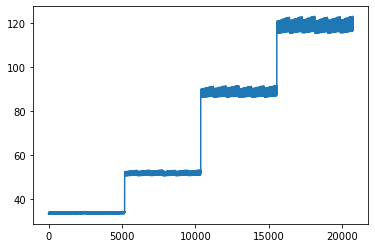

In [11]:
plt.plot([dict_all[x]['general_battery_parameters']['pack_energy_kWh'] for x in dict_all.keys()])

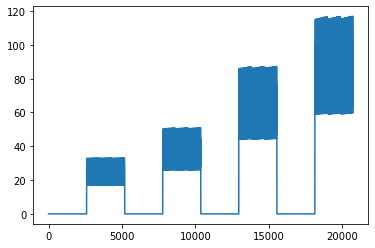

In [16]:
plt.plot([dict_all[x]['material_content_pack']["anode active material (natural graphite)"] for x in dict_all.keys()])